In [1]:
"""
Plotting examples for SpiffyPlots
"""
import numpy as np
import matplotlib.pyplot as plt
from spiffyplots import MultiPanel

%matplotlib notebook

In [2]:
# Data
# # # # # #

data = {
    "scatter1-x": np.random.randn(200),
    "scatter1-y": np.random.randn(200),
    "scatter2-x": np.random.rand(200),
    "scatter2-y": np.random.rand(200),
    "hist-gauss": np.random.randn(500),
    "hist-gamma": np.random.gamma(5, 8, 500),
    "heatmap": np.random.rand(100).reshape(10, 10),
    "timeseries1": np.array(
        [np.sin(np.arange(0, 25, 0.1)) + np.random.randn(250) for _ in range(20)]
    ),
    "timeseries1-true": np.sin(np.arange(0, 25, 0.1)),
    "timeseries2": np.array(
        [np.cos(np.arange(0, 25, 0.1)) + np.random.randn(250) for _ in range(20)]
    ),
    "timeseries2-true": np.cos(np.arange(0, 25, 0.1)),
}


In [3]:

# Functions
# # # # # # # #


def hist(axis, dat, c="black"):
    axis.hist(dat, color=c)
    axis.set_xlabel("value")
    axis.set_ylabel("frequency")


def scatter(axis, x, y, c="black"):
    axis.scatter(x, y, alpha=0.6, facecolor=c)
    axis.set_xlabel("variable 1")
    axis.set_ylabel("variable 2")


def timeseries(axis, y, true=False, c="black"):
    x = np.arange(0, y.shape[1])
    std = np.std(y, 0)
    axis.plot(y.mean(0), zorder=1, color=c)
    if True:
        axis.plot(true, zorder=2, color="black")
    axis.fill_between(
        x, y.mean(0) - std, y.mean(0) + std, zorder=0, facecolor=c, alpha=0.3
    )
    axis.set_xlabel("time (s)")
    axis.set_ylabel("value")


<IPython.core.display.Javascript object>


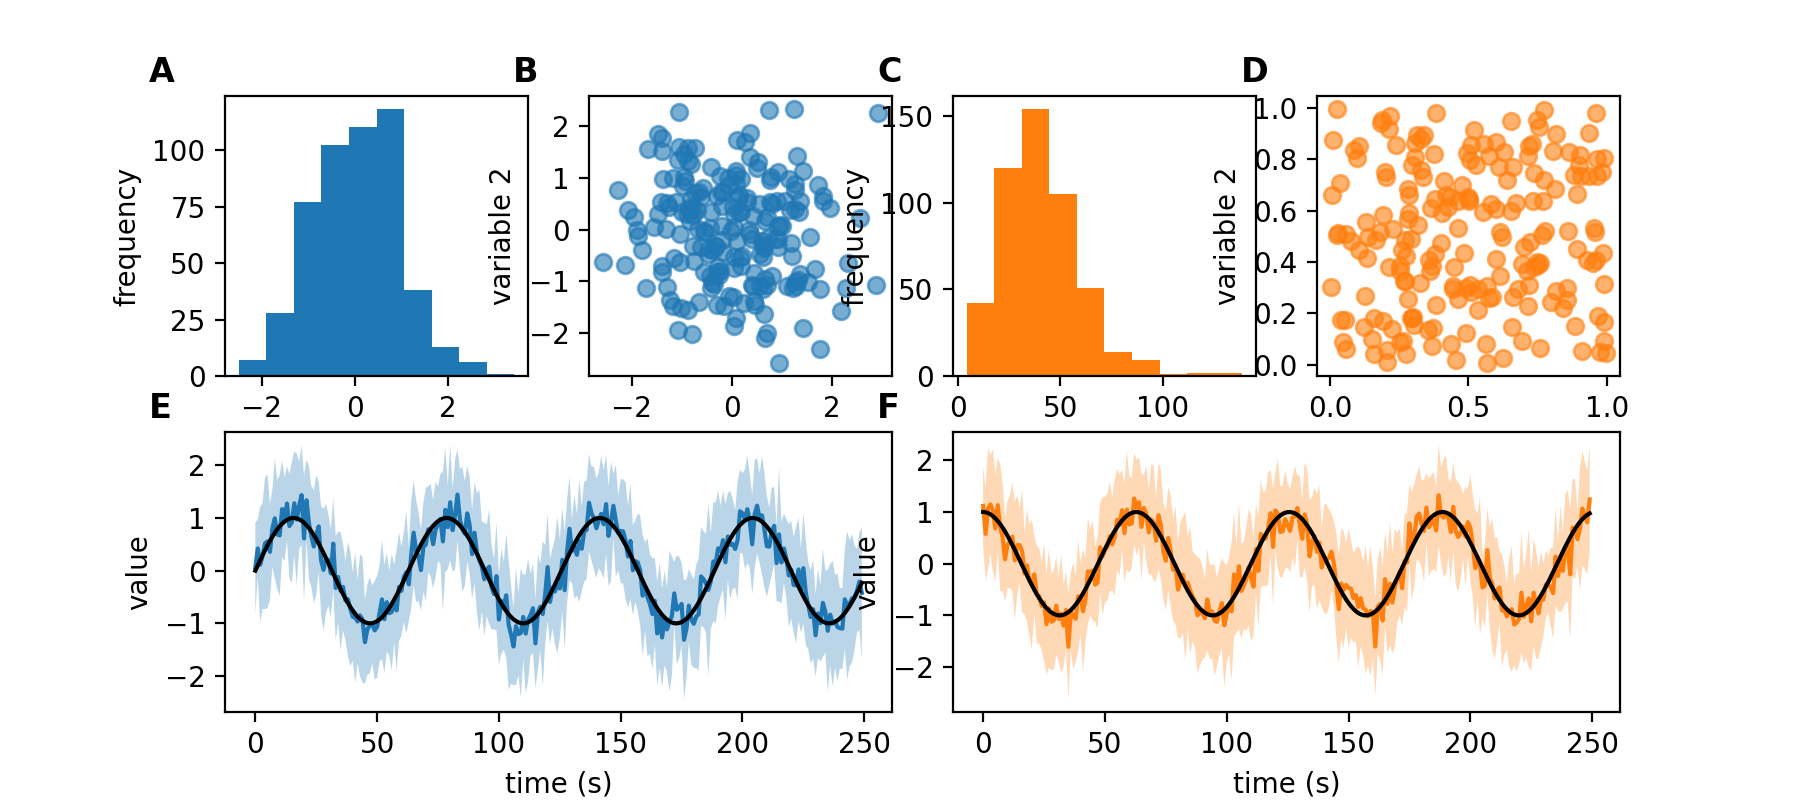

In [4]:
# PLOTTING
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig = MultiPanel(
    grid=(4, 2),
    figsize=(9, 4),
    labels=True
)

hist(fig.panels[0], data["hist-gauss"], colors[0])
scatter(fig.panels[1], data["scatter1-x"], data["scatter1-y"], colors[0])
timeseries(fig.panels[4], data["timeseries1"], data["timeseries1-true"], colors[0])

hist(fig.panels[2], data["hist-gamma"], colors[1])
scatter(fig.panels[3], data["scatter2-x"], data["scatter2-y"], colors[1])
timeseries(fig.panels[5], data["timeseries2"], data["timeseries2-true"], colors[1])

fig.fig.savefig("multipanel_mpl.png")
plt.show()

<IPython.core.display.Javascript object>


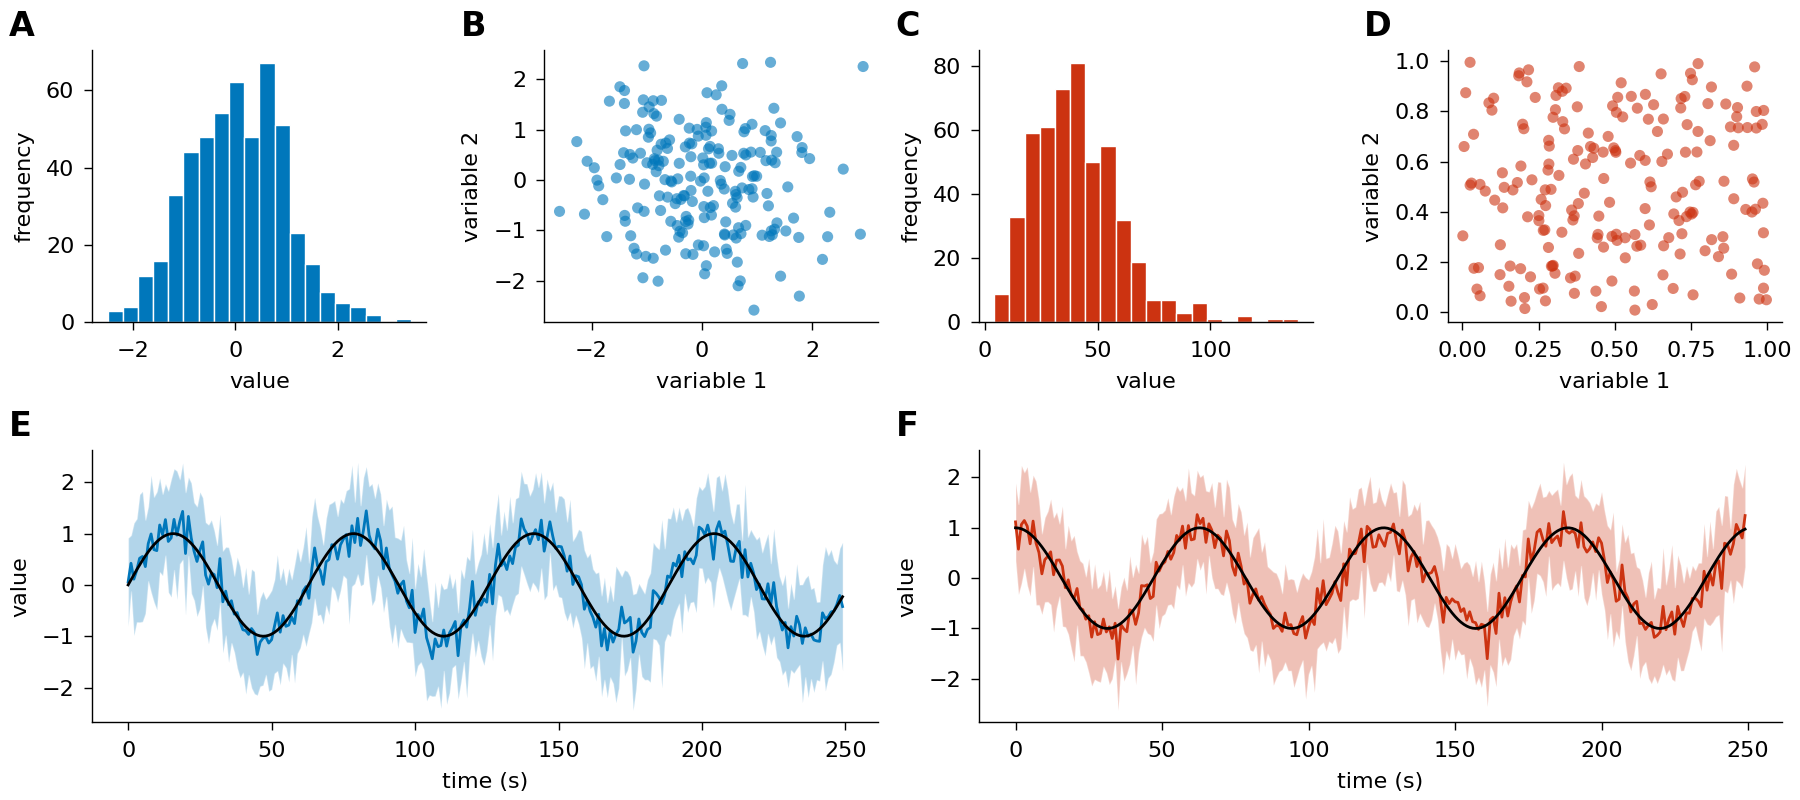

In [5]:
plt.style.use("spiffy")
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig = MultiPanel(
    grid=(4, 2),
    figsize=(9, 4),
    labels=True
)

hist(fig.panels[0], data["hist-gauss"], colors[0])
scatter(fig.panels[1], data["scatter1-x"], data["scatter1-y"], colors[0])
timeseries(fig.panels[4], data["timeseries1"], data["timeseries1-true"], colors[0])

hist(fig.panels[2], data["hist-gamma"], colors[1])
scatter(fig.panels[3], data["scatter2-x"], data["scatter2-y"], colors[1])
timeseries(fig.panels[5], data["timeseries2"], data["timeseries2-true"], colors[1])

fig.fig.savefig("multipanel_spiffy.png")
plt.show()
